### SVM
* support vector machine
* 분류나 회귀분석에 사용가능한 기법
   + 분류쪽 성능이 뛰어나서 주로 분류에 많이 사용


* 신경망에 비해 간결해서 뛰어난 성능을 보여준 탓에 신경망에 암흑기를 가져다 준 대표적인 머신러닝 알고리즘
* 이미지 인식이나 필체패턴 인식과 같은 작업에 주로 사용
* 마진을 최대로 하는 결정경계를 찾는 것이 SVM의 주된 알고리즘
* 결정경계는 서로 다른 분류값을 결정짓는 경계
   + line, plane(2D), hyperplane(3D)


* 마진은 결정경계와 서포트벡터간의 거리를 의미
* 서포트벡터는 결정경계를 만드는데 영향을 주는 최전방 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

### 선형으로 분류가 가능한 예
+ 점들이 두 집단으로 잘 분류된 예제

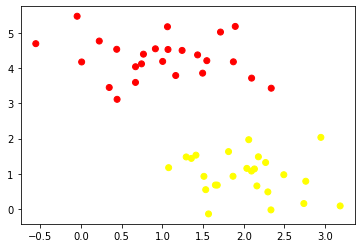

In [2]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

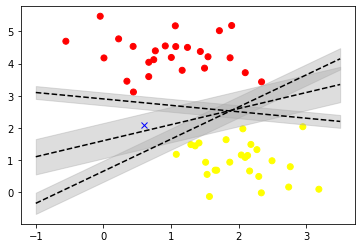

In [3]:
# 빨간점과 노란점으로 구성된 집합을 적절히 구분하려고 할때 3개의 직선중 어느것이 가장 최적으로 분류한 것일까?
# 두 개의 데이터 집합을 잘 분리하는 직선을 그려봄
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.plot([0.6],[2.1], 'x', color='blue') # 테스트 점

# 3개의 직선 긋기
xfit = np.linspace(-1, 3.5)
for m,b,d in [(1,0.65,0.33), (0.5,1.6,0.55), (-0.2,2.9,0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'k--')
    plt.fill_between(xfit, yfit-d, yfit+d,color='#AAAAAA', alpha=0.4)
    
# 가운데 직선은 다른 두 직선에 비해 비교적 여유(마진)있게 두 집합을 가르고 있음
# 이 덕택에 테스트 점 역시 여유있게 분류 가능
# 이렇게 최적으로 분류할 수 있는 직선을 통해 나눠진 영역을 초평면hyperplane이라 함

In [4]:
## SVM을 이용해서 초평면 구하기
from sklearn.svm  import  SVC

In [5]:
# kernel : 초평면 알고리즘 지정
svc = SVC(kernel='linear')
svc.fit(X, y)

SVC(kernel='linear')

In [6]:
# 초평면/서포트벡터 정보
svc.coef_[0][0], svc.coef_[0][1]  # 회귀계수
svc.intercept_[0]       # 절편
svc.support_vectors_    # 서포트벡터

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

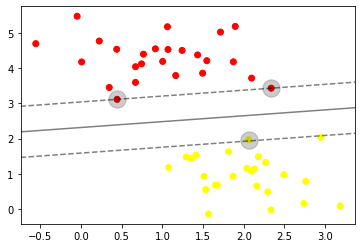

In [7]:
## 결정경계 시각화
import svm_visual

# 서포트벡트 표시
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], alpha=0.2, s=300, facecolor='k')
svm_visual.plot_svc_decision_function(svc)

### 비선형 분류
* 선형적으로 분류가 불가능한 경우에 대해서도 초평면을 구할 수 있을까?

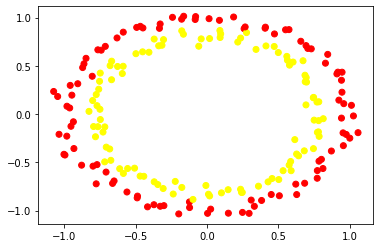

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200,noise=0.04, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

### 커널 트릭

* 구분이 불가능한 집합은 구분이 가능한 방향으로 맵핑시킨 새로운 공간에서는 구분이 가능할 것임
* 차원을 변환시키는 mapping 함수를 통해 기존의 2차원 공간에 새로운 차원을 추가해서3차원으로 변환할 수 있다면 선형적으로 구분이 가능해 짐
* 선형적으로 불가능한 차원을선형적으로 구분이 가능한 고차원으로 변환하는 것을 커널 트릭이라 하고 이때 사용하는 함수를 커널 함수라 함
* 대표적인 커널함수는 카우시안 커널RBF이고 이것을 통해 무한대 차원으로 매핑 가능

In [9]:
## 2차원 데이터를 3차원으로 변환후 시각화
from mpl_toolkits.mplot3d import Axes3D

X, y = make_circles(n_samples=200,noise=0.04, random_state=0)

In [10]:
# 커널함수 : 2차원을 3차원으로 변환
z = np.exp(-(X ** 2).sum(1))

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


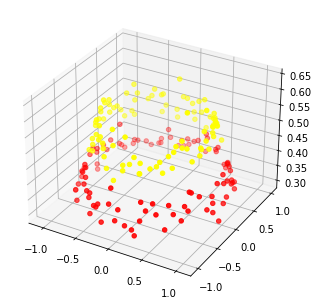

In [11]:
# 3차원으로 시각화
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], z, c=y, cmap='autumn')

In [12]:
# svm 시각화
import svm_visual

In [13]:
# SVC 초매개변수
# C(cost) : 규제 매개변수 (정확도 제한)
# gamma   : 결정경계 곡률(마진) 조정(값이 크면 결정경계면은 좁아짐)

svc = SVC(kernel='rbf', C=10.0, gamma=0.1, random_state=0)
svc.fit(X, y)
svc.score(X, y)   # 0.99

0.99

/home/hadoop/svm_visual.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolor='black')


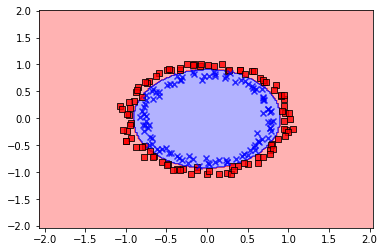

In [14]:
svm_visual.plot_decision_regions(X, y, svc)

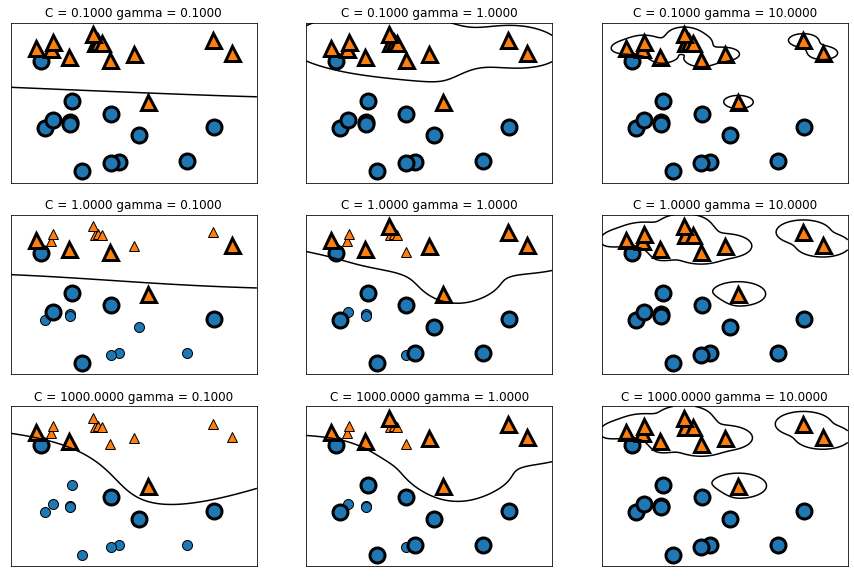

In [15]:
## SVM 규제/감마 매개변수 알아보기
# pip install mglearn

import mglearn
fig,axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
       mglearn.plots.plot_svm(log_C=C,log_gamma=gamma, ax=a)

In [16]:
## iris 데이터를 SVM의 RBF커널로 분석
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
#data = iris.data[:, 0:2]
data = iris.data[:, 2:]
target = iris.target
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3, random_state=2111161155, stratify=target)

In [17]:
svc = SVC(kernel='rbf')
svc.fit(Xtrain, ytrain)
pred = svc.predict(Xtest)
svc.score(Xtrain, ytrain), accuracy_score(pred, ytest)
# 0.81, 0.82

(0.9523809523809523, 0.9777777777777777)

/home/hadoop/svm_visual.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolor='black')
/home/hadoop/svm_visual.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolor='black')


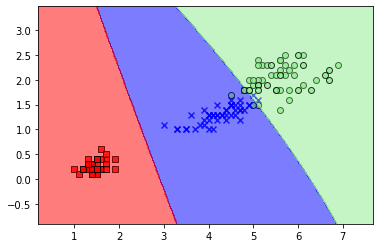

In [18]:
svm_visual.plot_decision_regions(Xtrain, ytrain, svc)
svm_visual.plot_decision_regions(Xtest, ytest, svc)

<img src='img/pca.gif'>

### 고유값/고유벡터 찾아보기
+ Ax = λ(람다)x
+ 선형변환 A = [[3,1],[1,3]]을 만족하는 고유백터 x화 고유값 λ은?

In [19]:
A = [[3,1],[1,3]] # 선형 변환
x1 = [-1, 1]
x2 = [1, 1]
x3 = np.dot(A, x1) # 행렬 곱연산, 선형변환 적용
x4 = np.dot(A, x2)

origin = [0],[0] # 백터공간 원점의 정의

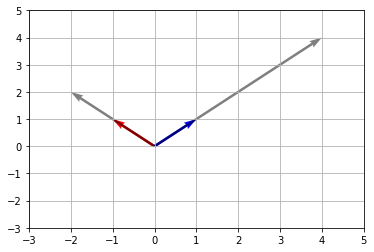

In [20]:
# 변환전 벡터
# quiver 함수 : 그래프에 화살표 벡터를 표시
# quiver(원점, x좌표, y좌표, 색상, 각도, 단위)
plt.quiver(*origin, x1[0], x1[1], color='r',angles='xy', scale_units='xy',scale=1)
plt.quiver(*origin, x2[0], x2[1], color='b',angles='xy', scale_units='xy',scale=1)

# 변환 후
plt.quiver(*origin, x3[0], x3[1], color='k', alpha=0.5, angles='xy', scale_units='xy',scale=1)
plt.quiver(*origin, x4[0], x4[1], color='k', alpha=0.5, angles='xy', scale_units='xy',scale=1)

plt.xlim(-3,5)
plt.ylim(-3,5)
plt.grid(True)

In [21]:
# numpy 함수로 고유값 알아내기

np.set_printoptions(formatter={'float_kind':'{:.0f}'.format}, suppress=True)

A = np.array([[3,1],[1,3]])
eigval, eigvec = np.linalg.eig(A)
eigval, eigvec

(array([4, 2]),
 array([[1, -1],
        [1, 1]]))